<a href="https://colab.research.google.com/github/areebahassan0099/FA24-BBD-086-DataAnalytics-/blob/main/Areeba_Hassan_FA24_BBD_086(SQL_Queries_in_Python_with_SQLite_and_pandas)_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Running SQL Queries in Python with SQLite and pandas
**Objective**: In this lab, you'll learn how to connect to a SQLite database in Python, run SQL queries, and analyze the results using pandas.

## Part 1 – Connect to SQLite and Explore Tables

In [ ]:
# Import required libraries
import sqlite3
import pandas as pd

In [ ]:
# Connect to the Chinook database
conn = sqlite3.connect('chinook.db')  # Ensure the chinook.db file is in the working directory

In [ ]:
# Get the list of all table names in the database
# Method1
query = "SELECT name FROM sqlite_master WHERE type='table'"
tables = pd.read_sql_query(query, conn)
tables
# Method 2
#tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
#tables

name
0            albums
1   sqlite_sequence
2           artists
3         customers
4         employees
5            genres
6          invoices
7     invoice_items
8       media_types
9         playlists
10   playlist_track
11           tracks
12     sqlite_stat1

In [ ]:
# Preview data from the 'customers' table first five rows
query = "SELECT * FROM customers LIMIT 5; "
df = pd.read_sql_query (query, conn)
print (df)

   CustomerId  FirstName     LastName  \
0           1       Luís    Gonçalves   
1           2     Leonie       Köhler   
2           3   François     Tremblay   
3           4      Bjørn       Hansen   
4           5  František  Wichterlová   

                                            Company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                              None   
2                                              None   
3                                              None   
4                                  JetBrains s.r.o.   

                           Address                 City State         Country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP          Brazil   
1          Theodor-Heuss-Straße 34            Stuttgart  None         Germany   
2                1498 rue Bélanger             Montréal    QC          Canada   
3                 Ullevålsveien 14                 Oslo  None          Norway   
4                

In [ ]:
# Importing interactive Google Sheets
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1MT8WKgQxitD84C-c1M4m2Y3azbugoz8V3MjLOrMpmZw/edit#gid=0


## Part 2 – Apply SQL Queries in Python

In [ ]:
query = """SELECT * FROM customers WHERE Country = 'USA'"""
q

Empty DataFrame
Columns: [City]
Index: []

In [ ]:
# Get employees located in Canada and Calgary
query = """SELECT City, Country FROM employees WHERE Country = 'Canada' AND City='Calgary' """
pd.read_sql_query(query, conn)


City Country
0  Calgary  Canada
1  Calgary  Canada
2  Calgary  Canada
3  Calgary  Canada
4  Calgary  Canada

In [ ]:
# Count the number of customers by country
query = """
SELECT Country, COUNT(*) AS NumberOfCustomers
FROM customers
GROUP BY Country;
"""
pd.read_sql_query(query, conn)
#The triple quotes allow you to write the SQL query just like you would in a SQL editor—across multiple lines.
#Without triple quotes, you would need to use long single-line strings with \n, which is harder to read and maintain.
# You can use either ''' or """ for multi-line strings in Python—they work the same way. Just stay consistent.



Country  NumberOfCustomers
0        Argentina                  1
1        Australia                  1
2          Austria                  1
3          Belgium                  1
4           Brazil                  5
5           Canada                  8
6            Chile                  1
7   Czech Republic                  2
8          Denmark                  1
9          Finland                  1
10          France                  5
11         Germany                  4
12         Hungary                  1
13           India                  2
14         Ireland                  1
15           Italy                  1
16     Netherlands                  1
17          Norway                  1
18          Poland                  1
19        Portugal                  2
20           Spain                  1
21          Sweden                  1
22             USA                 13
23  United Kingdom                  3

In [ ]:
# Total amount spent per billing country
# table is invoices
# billingcountry is a column
# SUM is the command

query = """
SELECT BillingCountry, SUM(Total) AS TotalSpent
FROM invoices
GROUP BY BillingCountry;
"""
pd.read_sql_query(query, conn)


BillingCountry  TotalSpent
0        Argentina       37.62
1        Australia       37.62
2          Austria       42.62
3          Belgium       37.62
4           Brazil      190.10
5           Canada      303.96
6            Chile       46.62
7   Czech Republic       90.24
8          Denmark       37.62
9          Finland       41.62
10          France      195.10
11         Germany      156.48
12         Hungary       45.62
13           India       75.26
14         Ireland       45.62
15           Italy       37.62
16     Netherlands       40.62
17          Norway       39.62
18          Poland       37.62
19        Portugal       77.24
20           Spain       37.62
21          Sweden       38.62
22             USA      523.06
23  United Kingdom      112.86

## Part 3 – Join and Analyze Tables

In [ ]:
# Join customers and invoices to show customer names and invoice totals
query = """
SELECT customers.FirstName, customers.LastName, invoices.InvoiceDate, invoices.Total
FROM customers
INNER JOIN invoices ON customers.CustomerId = invoices.CustomerId;
"""
pd.read_sql_query(query, conn)

FirstName    LastName          InvoiceDate  Total
0        Luís   Gonçalves  2010-03-11 00:00:00   3.98
1        Luís   Gonçalves  2010-06-13 00:00:00   3.96
2        Luís   Gonçalves  2010-09-15 00:00:00   5.94
3        Luís   Gonçalves  2011-05-06 00:00:00   0.99
4        Luís   Gonçalves  2012-10-27 00:00:00   1.98
..        ...         ...                  ...    ...
407      Puja  Srivastava  2009-07-08 00:00:00   5.94
408      Puja  Srivastava  2010-02-26 00:00:00   1.99
409      Puja  Srivastava  2011-08-20 00:00:00   1.98
410      Puja  Srivastava  2011-09-30 00:00:00  13.86
411      Puja  Srivastava  2012-05-30 00:00:00   8.91

[412 rows x 4 columns]

In [ ]:
# Join invoices, invoice_items, and tracks to show invoice details
query = """
SELECT invoices.InvoiceId, tracks.Name AS TrackName, invoice_items.UnitPrice, invoice_items.Quantity
FROM invoices
INNER JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
INNER JOIN tracks ON invoice_items.TrackId = tracks.TrackId;
"""
pd.read_sql_query(query, conn)

InvoiceId                      TrackName  UnitPrice  Quantity
0            98            Experiment In Terra       1.99         1
1            98              Take the Celestra       1.99         1
2           121              Shout It Out Loud       0.99         1
3           121               Calling Dr. Love       0.99         1
4           121                       Strutter       0.99         1
...         ...                            ...        ...       ...
2235        284           Esporrei Na Manivela       0.99         1
2236        284  No Fundo Do Quintal Da Escola       0.99         1
2237        284                 Que Luz É Essa       0.99         1
2238        284          The Power Of Equality       0.99         1
2239        284   Mellowship Slinky In B Major       0.99         1

[2240 rows x 4 columns]

In [ ]:
# Show invoice totals grouped by artist
query = """
SELECT artists.Name AS ArtistName, SUM(invoices.Total) AS TotalRevenue
FROM customers
INNER JOIN invoices ON customers.CustomerId = invoices.CustomerId
INNER JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
INNER JOIN tracks ON invoice_items.TrackId = tracks.TrackId
INNER JOIN albums ON tracks.AlbumId = albums.AlbumId
INNER JOIN artists ON albums.ArtistId = artists.ArtistId
GROUP BY artists.Name
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
pd.read_sql_query(query, conn)

ArtistName  TotalRevenue
0    Iron Maiden       1233.54
1             U2        895.59
2           Lost        833.70
3   Led Zeppelin        620.73
4      Metallica        599.94
5    Deep Purple        550.44
6      Pearl Jam        408.87
7  Lenny Kravitz        372.51
8      Van Halen        336.82
9     The Office        328.80

## Part 4 – Visualize SQL Output with Python

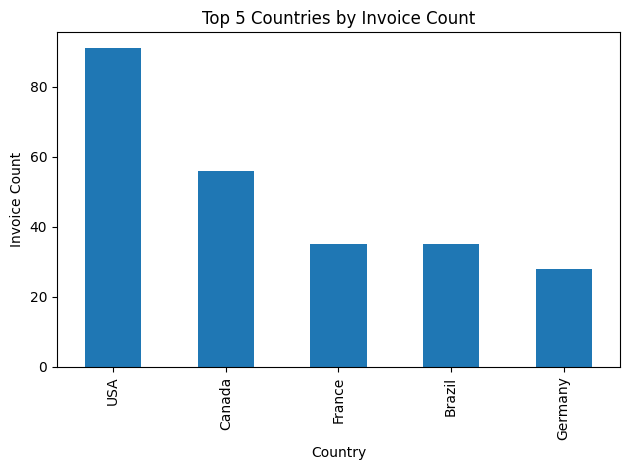

In [ ]:
# Bar chart: Top 5 countries by number of invoices
import matplotlib.pyplot as plt

query = """
SELECT BillingCountry, COUNT(*) AS InvoiceCount
FROM invoices
GROUP BY BillingCountry
ORDER BY InvoiceCount DESC
LIMIT 5;
"""
df = pd.read_sql_query(query, conn)
df.plot(kind='bar', x='BillingCountry', y='InvoiceCount', legend=False)
plt.title("Top 5 Countries by Invoice Count")
plt.ylabel("Invoice Count")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

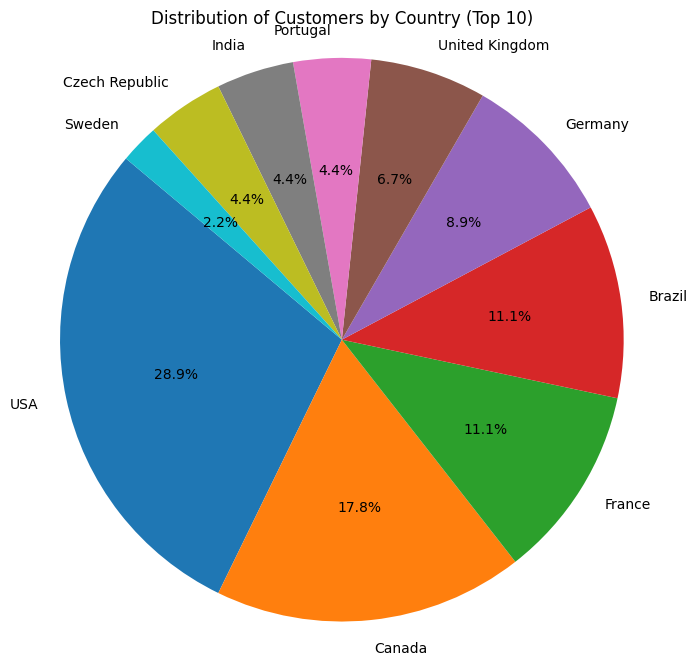

In [ ]:
# Pie chart: Distribution of customers by country (top 10)
query = """
SELECT Country, COUNT(*) AS NumberOfCustomers
FROM customers
GROUP BY Country
ORDER BY NumberOfCustomers DESC
LIMIT 10;
"""
df_customers = pd.read_sql_query(query, conn)

plt.figure(figsize=(8, 8))
plt.pie(df_customers['NumberOfCustomers'], labels=df_customers['Country'], autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Customers by Country (Top 10)")
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Figure size 1000x600 with 0 Axes>

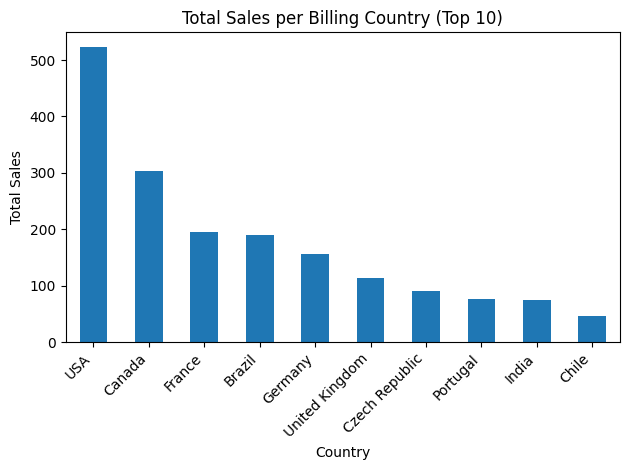

In [ ]:
# Bar chart: Total sales per billing country (top 10)
query = """
SELECT BillingCountry, SUM(Total) AS TotalSpent
FROM invoices
GROUP BY BillingCountry
ORDER BY TotalSpent DESC
LIMIT 10;
"""
df_sales = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
df_sales.plot(kind='bar', x='BillingCountry', y='TotalSpent', legend=False)
plt.title("Total Sales per Billing Country (Top 10)")
plt.ylabel("Total Sales")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Bar chart: Top 10 artists by total revenue (already calculated in the previous code)
query = """
SELECT artists.Name AS ArtistName, SUM(invoices.Total) AS TotalRevenue
FROM customers
INNER JOIN invoices ON customers.CustomerId = invoices.CustomerId
INNER JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
INNER JOIN tracks ON invoice_items.TrackId = tracks.TrackId
INNER JOIN albums ON tracks.AlbumId = albums.AlbumId
INNER JOIN artists ON albums.ArtistId = artists.ArtistId
GROUP BY artists.Name
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
df_artist_revenue = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 7))
df_artist_revenue.plot(kind='bar', x='ArtistName', y='TotalRevenue', legend=False)
plt.title("Top 10 Artists by Total Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Artist")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Lab Wrap-up

In [ ]:
# Close the connection to the database
conn.close()